In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import json
import numpy as np

## Read data
### Bag of Words


#### Original code

In [161]:
# X = None
# y = None
# start = True
# size = 5000

# count = 0

# with open("../../data/domain1_train.json") as f:
#     for line in f:
#         # read line by line
#         data = json.loads(line)
        
#         # Bag of Words
#         new_line = np.zeros((1, size))
#         for i in data["text"]:
#             new_line[0][i] = new_line[0][i] + 1

#         if start:
#             X = np.array(new_line)
#             y = np.array(data["label"])
#             start = False
#         else:
#             X = np.append(X, new_line, axis=0)
#             y = np.append(y, data["label"])

#         count = count + 1
#         if count == 100:
#             break


#### Faster version

In [4]:
text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])


#### Length of data

In [15]:
len(text)

19500

#### Create dummy data for making vertor space

In [10]:
vector_sample = [np.arange(5000).tolist()]
vector_sample += text[:200]
print("instance size:", len(vector_sample))

instance size: 201


#### Vectorize the data

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b", ngram_range=(1, 2))

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
# print("Encoded Document is:")
# print(vector.toarray())


#### Length of columns

In [14]:
len(vectorizer.vocabulary_)

13858

#### Columns names

In [293]:
# vectorizer.get_feature_names_out()

#### Transform dataset for Random Forest model

In [16]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (19500, 13858)
Shape of y: (19500,)


In [17]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [18]:
print(clf.predict([X[2]]), y[2])

[1] 1


In [19]:
from sklearn.model_selection import cross_val_score

scores = []
n = 10
for i in range(2, 6, 1):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    score = sum(cross_val_score(clf, X, y, cv=n)) / n
    scores.append(score)

print(scores)

[0.8387692307692307, 0.8431794871794873, 0.8616923076923075, 0.8688205128205129]


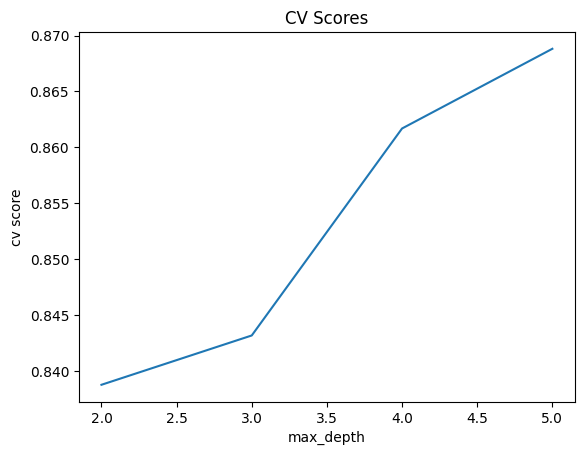

In [20]:
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(range(2, 6, 1), scores)
  
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('cv score')
  
# giving a title to my graph
plt.title('CV Scores')
  
# function to show the plot
plt.show()

#### Test for domain 2 data

In [34]:
text = []
label = []

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

In [35]:
# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[ 3  0  3 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 [84  8  4 ...  0  0  0]
 ...
 [ 3  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 2  0  1 ...  0  0  0]]


In [36]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14900, 13858)
Shape of y: (14900,)


#### SMOTENC

In [30]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
print(f'Original dataset samples per class {Counter(y)}')

# simulate the 2 last columns to be categorical features
# X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
sm = SMOTENC(random_state=42 , categorical_features=[0,1,2,3])
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Original dataset shape (14900, 13858)
Original dataset samples per class Counter({0: 12750, 1: 2150})
Resampled dataset samples per class Counter({1: 12750, 0: 12750})


#### Option for this step
#### - Skip the training step
- So the model have not learnt the domain 2 data
- Hoe the model predict unseen data(domain 2)?

#### - Model training for the domain 2 data

In [31]:
# For fitting model
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_score(clf, X, y, cv=10)


array([0.8557047, 0.8557047, 0.8557047, 0.8557047, 0.8557047, 0.8557047,
       0.8557047, 0.8557047, 0.8557047, 0.8557047])

#### Now predict the test data

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import json
import numpy as np

text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

with open("../../data/domain2_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])


In [4]:
vector_sample = [np.arange(5000).tolist()]
vector_sample += text[:10]
vector_sample += text[-10:]
print("instance size:", len(vector_sample))

instance size: 21


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b", ngram_range=(1, 2))

vectorizer.fit(vector_sample)

# Encode the Document
vector = vectorizer.transform(text)

X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (34400, 10769)
Shape of y: (34400,)


In [6]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC # Numerical & Categorical
from imblearn.over_sampling import SMOTEN # Categorical

# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
print(f'Original dataset samples per class {Counter(y)}')

# simulate the 2 last columns to be categorical features
# X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
# sm = SMOTEN(random_state=42)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Original dataset shape (34400, 10769)
Original dataset samples per class Counter({0: 22500, 1: 11900})
Resampled dataset samples per class Counter({1: 22500, 0: 22500})


In [45]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
print(cross_val_score(clf, X, y, cv=10))

clf.fit(X, y)

[0.65406977 0.65406977 0.65406977 0.65406977 0.65406977 0.65406977
 0.65406977 0.65406977 0.65406977 0.65406977]


In [7]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
print(cross_val_score(clf, X_res, y_res, cv=10))

clf.fit(X_res, y_res)

[0.70977778 0.70088889 0.71466667 0.702      0.55977778 0.76066667
 0.85622222 0.86422222 0.84911111 0.84444444]


RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
sum([0.70977778, 0.70088889, 0.71466667, 0.702,      0.55977778, 0.76066667, 0.85622222, 0.86422222, 0.84911111, 0.84444444])

7.561777780000001

In [13]:
text = []

with open("../../data/test_set.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])

In [14]:
# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X = vector.toarray()

print("Shape of X:", X.shape)

Encoded Document is:
[[32  4  6 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 7  0  1 ...  0  0  0]
 [27  0  3 ...  0  0  0]]
Shape of X: (1000, 10769)


In [16]:
import pandas as pd

y = clf.predict(X)
print(y)

result = pd.DataFrame({"class":y}).reset_index().rename(columns = {'index':'id'})
result.to_csv("./result_RF_res_ngram.csv", index=False)

[0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 

## Feedback
### - Accuracy is good and the length is fixed to 5000.
### - Can well fit to fluctuating text lengths
### - Bag of words works well !!!